# 実習１：飛行機の乗客数データ

In [1]:
%matplotlib inline
import numpy as np
np.random.seed(555)
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from statsmodels.graphics import tsaplots
from statsmodels.tsa import stattools
from statsmodels.tsa.arima_model import ARIMA

In [3]:
import requests
import io

# 飛行機の乗客数データ(月ごと)
url = "https://www.analyticsvidhya.com/wp-content/uploads/2016/02/AirPassengers.csv"
stream = requests.get(url).content
content = pd.read_csv(io.StringIO(stream.decode('utf-8')))

<AxesSubplot:xlabel='Month'>

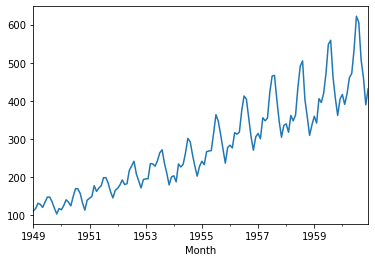

In [4]:
df_content = content.copy()
df_content['Month'] = pd.to_datetime(df_content['Month'], 
                                     infer_datetime_format=True)
y = pd.Series(df_content["#Passengers"].values, index=df_content['Month'])
y = y.astype('f')
y.plot()

# 変動の種類
<pre>
１. 傾向変動
２. 季節変動
３．不規則変動
<pre>

<ipython-input-7-1dd76ebb3b64>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  res = sm.tsa.seasonal_decompose(y, freq=12)


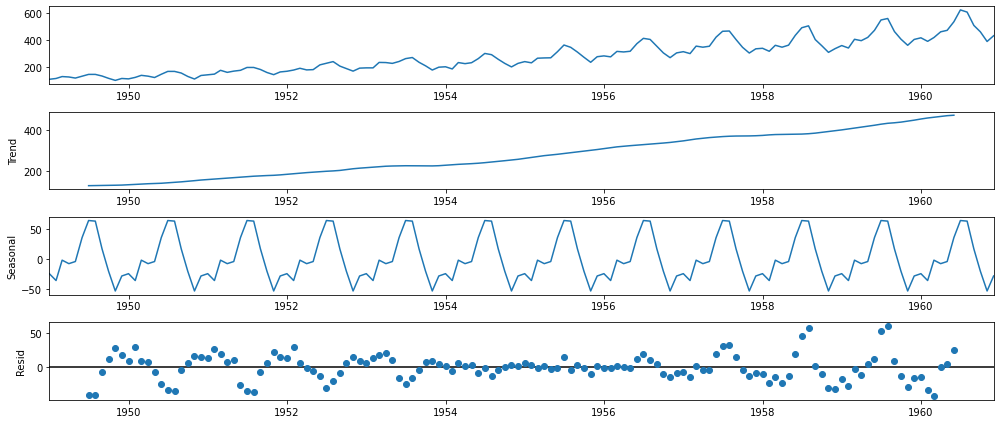

<Figure size 1200x400 with 0 Axes>

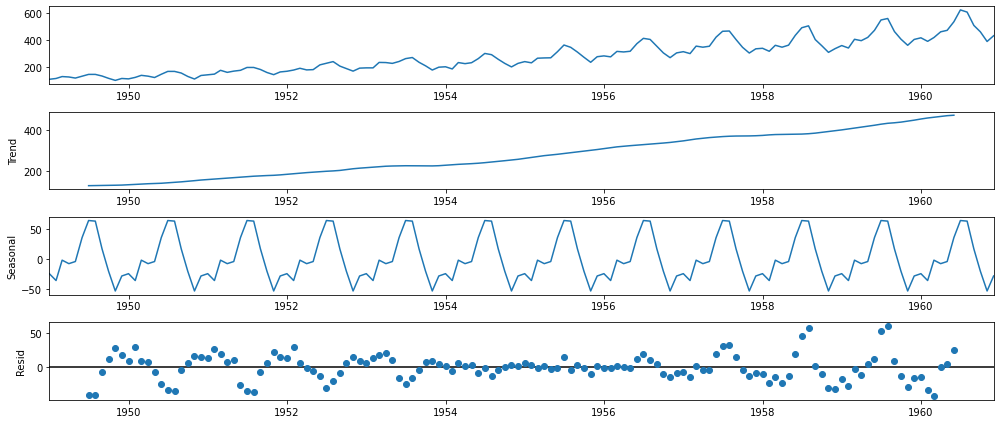

In [7]:
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(y, freq=12)

plt.rcParams["figure.figsize"] = (14, 6)
plt.figure(figsize=(24, 8), dpi=50)
res.plot()

# 1 自己回帰和分移動平均モデル

ARIMAとSARIMAの比較
<pre>
ARIMA
❏ 自己回帰モデル(ARモデル)
❏ 移動平均モデル(MAモデル)
❏ 和分モデル(Iモデル)

SARIMA
ARIMAに、季節変動を加えたモデル
</pre>

和文過程とARIMA過程
<pre>
❏ d-1階の差分をとった場合は非定常過程だが、d階差分を取った系列が定常過程の場合 -> I(d)過程
❏ I(0)過程は定常過程
</pre>

In [8]:
# yは上のコードで取得した月ごとの旅客機の乗客数データ
y120 = y[:120]

<img src="arma.png">

<pre>
p, φは、自己回帰の次数および自己回帰係数。
q, θは、移動平均の次数および移動平均係数。
</pre>

# ARIMA: 階差をとらないモデル(p=3,d=0,q=2)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

<BarContainer object of 119 artists>

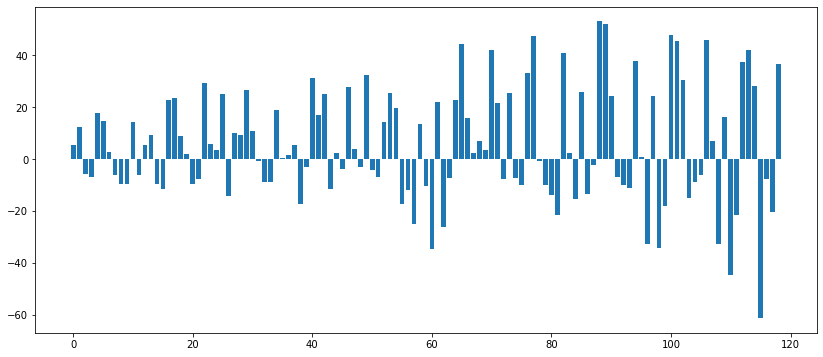

In [9]:
model_d0 = ARIMA(y120, (3, 0, 2))
results_d0 = model_d0.fit()
res_d0 = results_d0.resid
# 残差の出力
plt.bar(range(len(res_d0[1:])), res_d0[1:])

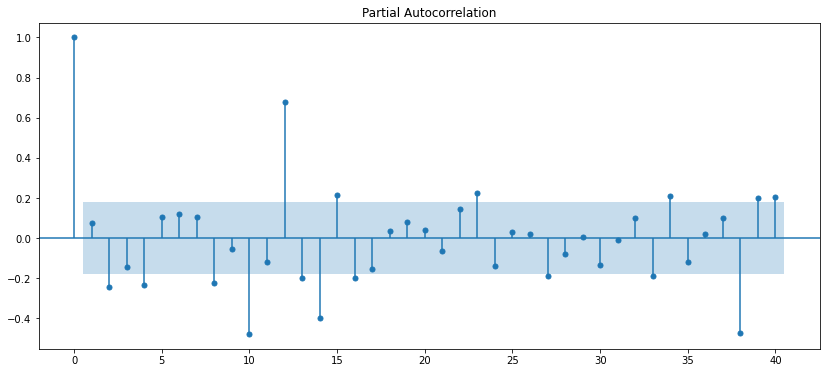

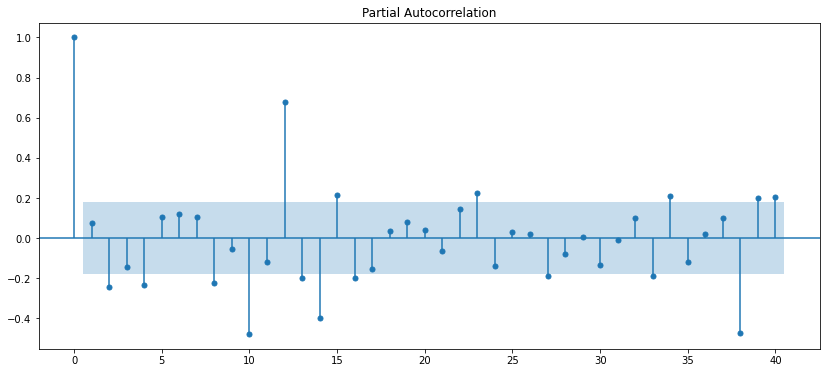

In [10]:
# 偏自己相関
tsaplots.plot_pacf(res_d0[1:], lags=40)
# ランダムウォーク過程のため自己相関はないことが確認できた

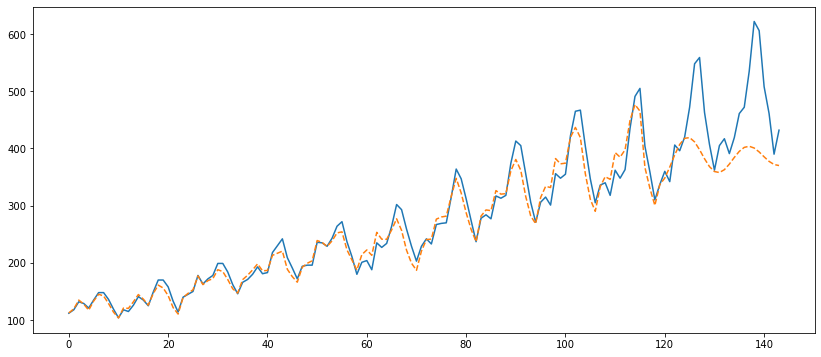

In [11]:
# 将来予測
# トレンドが捉えられていない
# 循環変動も捉えられていない

# 原系列の表示
plt.plot(y.values, label='observation')
# インサンプル（学習に使ったサンプルデータ）と
# ARIMA(3, 0, 2)による予測値を含めた系列の表示
# ARモデルの時とpredictの挙動が異なるので要注意
plt.plot(results_d0.predict(1, len(y)).values, 
         '--', label='forecast')

# ARIMA:階差1をとったモデル(p=4,d=1,q=1)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

<BarContainer object of 119 artists>

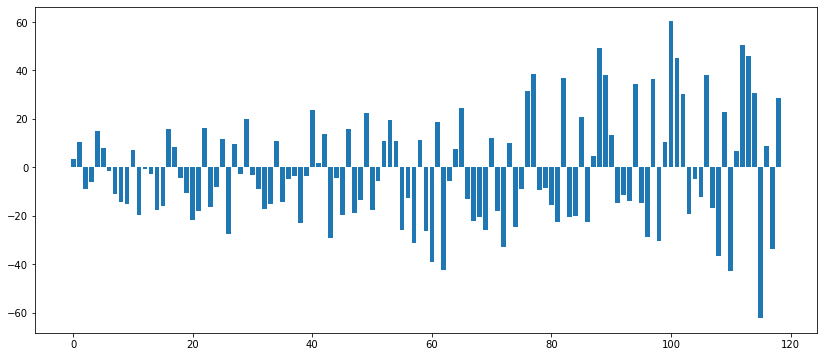

In [12]:
model_d1 = ARIMA(y120, (4, 1, 1))
results_d1 = model_d1.fit()
res_d1 = results_d1.resid
# 残差の出力
plt.bar(range(len(res_d1)), res_d1)

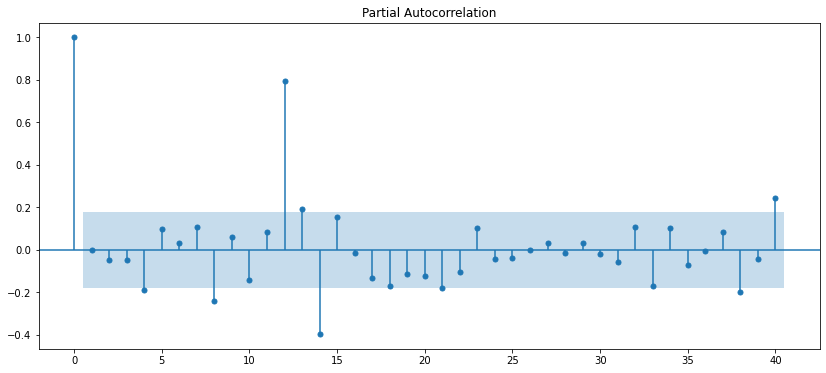

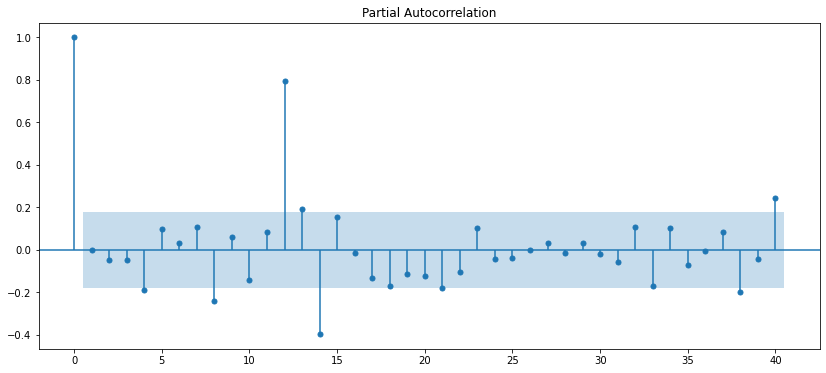

In [13]:
# 偏自己相関
tsaplots.plot_pacf(res_d1, lags=40)
# ランダムウォーク過程のため自己相関はないことが確認できた

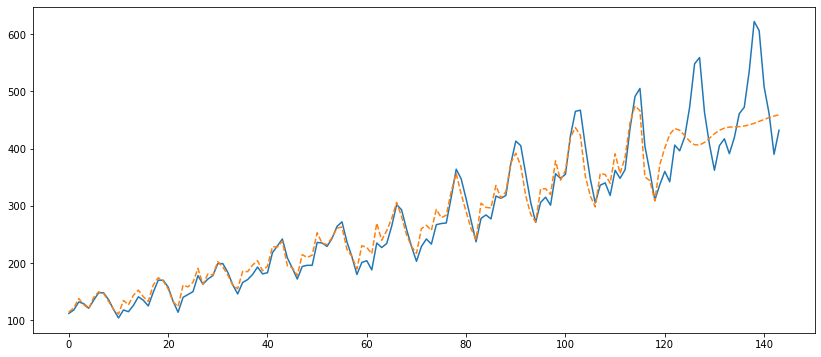

In [14]:
# 将来予測
# トレンドは捉えらているが、季節変動は捉えれらていない

# 原系列の表示
plt.plot(y.values, label='observation')
# インサンプル（学習に使ったサンプルデータ）と
# ARIMA(4, 1, 1)による予測値を含めた系列の表示
# 階差をとっているためインサンプルを
# 元データの形に戻すためtypオプションに'levels'を指定している
plt.plot(results_d1.predict(1, len(y), typ='levels').values, 
         '--', label='forecast')

# 【実習2】ARIMAとSARIMAを比較する
SARIMA（季節変動自己回帰和分移動平均）

In [16]:
from statsmodels.graphics import tsaplots
from statsmodels.tsa import stattools
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [17]:
p, d, q, sp, sd, sq = 2, 1, 2, 1, 1, 1
seasonal = 12

# SARIMAX(p=2,d=1,q=2; P=1,D=1,Q=1,s=12)モデルの当てはめ
result = SARIMAX(
    y120, order=(p,d,q), 
    seasonal_order=(sp,sd,sq,seasonal), 
    enforce_stationarity = False, 
    enforce_invertibility = False
).fit()
# 結果確認
print(result.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  120
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 12)   Log Likelihood                -343.463
Date:                              Sun, 16 Jul 2023   AIC                            700.926
Time:                                      09:21:27   BIC                            718.579
Sample:                                  01-01-1949   HQIC                           708.051
                                       - 12-01-1958                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2791      0.573      0.487      0.626      -0.844       1.402
ar.L2          0.46

<BarContainer object of 120 artists>

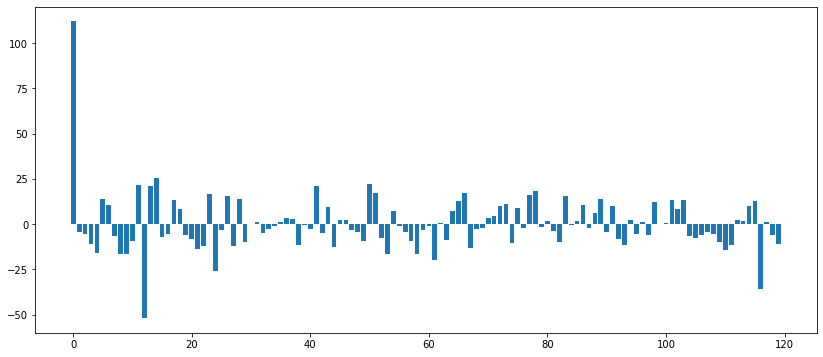

In [18]:
# 残差の抽出
res = result.resid
# 残差の出力
plt.bar(range(len(res)), res)

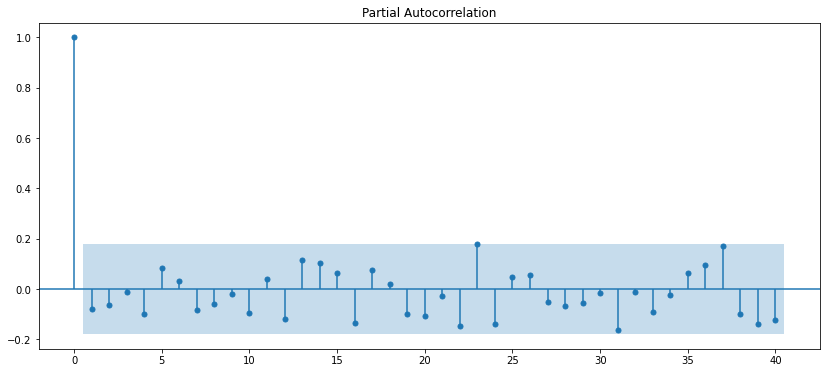

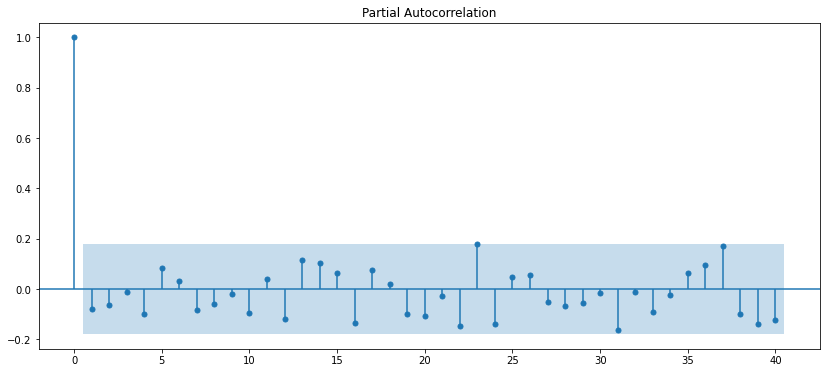

In [19]:
# 偏自己相関
tsaplots.plot_pacf(res, lags=40)
# ランダムウォーク過程のため自己相関はないことが確認できた

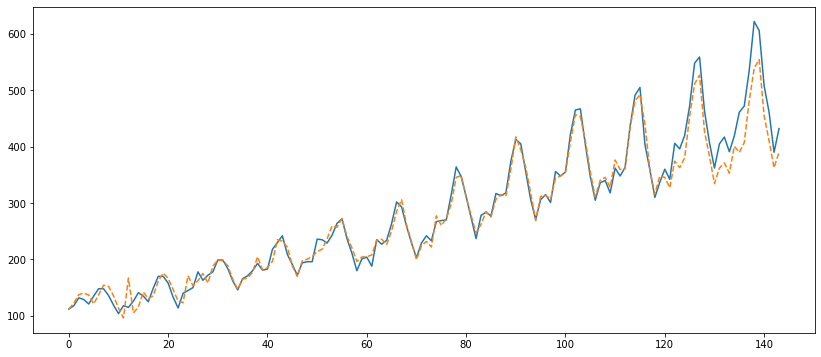

In [20]:
# 将来予測
plt.plot(y.values, label="observation")
plt.plot(np.hstack([y120[0], 
                    result.fittedvalues[1:], 
                    result.forecast(24)]), 
         '--', label="forecast")